# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy import stats
import joblib  


<ipython-input-1-72fb8e172083>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [2]:
# Load housing prices
housing_data = pd.read_csv('housing_prices.csv')

In [3]:
# Display the first and last rows
housing_data

,Square_Feet,Bedrooms,Age,Location_Rating,Price
0,1360,2,11,7.017154,600672
1,4272,3,31,7.108030,560878
2,3592,1,95,4.257280,676665
3,966,1,91,6.342947,566043
4,4926,2,12,1.091181,593599
...,...,...,...,...,...
995,3261,4,75,9.002151,531352
996,3179,1,14,6.209261,592094
997,2606,4,40,6.691522,599184
998,4723,5,38,2.408290,1021932


In [4]:
# show the number of rows and columns
housing_data.shape

(1000, 5)

In [5]:
# Check for missing values in each column
housing_data.isnull().sum() # no missing values

Square_Feet        0
Bedrooms           0
Age                0
Location_Rating    0
Price              0
dtype: int64

In [6]:
# Check for duplicated rows in the dataset
housing_data.duplicated().sum() # no duplicated rows

0

In [7]:
# Display data types, count
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Square_Feet      1000 non-null   int64  
 1   Bedrooms         1000 non-null   int64  
 2   Age              1000 non-null   int64  
 3   Location_Rating  1000 non-null   float64
 4   Price            1000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 39.2 KB


In [8]:
# List the name of columns in the dataset
housing_data.columns

Index(['Square_Feet', 'Bedrooms', 'Age', 'Location_Rating', 'Price'], dtype='object')

In [9]:
# descriptive statistics of the dataset
housing_data.describe()

,Square_Feet,Bedrooms,Age,Location_Rating,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,48.414000,5.483500,6.044307e+05
std,1255.514921,1.427564,29.183699,2.589672,1.814169e+05
min,503.000000,1.000000,0.000000,1.000105,1.087100e+05
25%,1749.500000,2.000000,22.000000,3.335411,4.775332e+05
50%,2862.500000,3.000000,47.000000,5.502313,6.003425e+05
75%,3849.500000,4.000000,74.000000,7.677870,7.320828e+05
max,4999.000000,5.000000,99.000000,9.980388,1.039240e+06


# Visualization

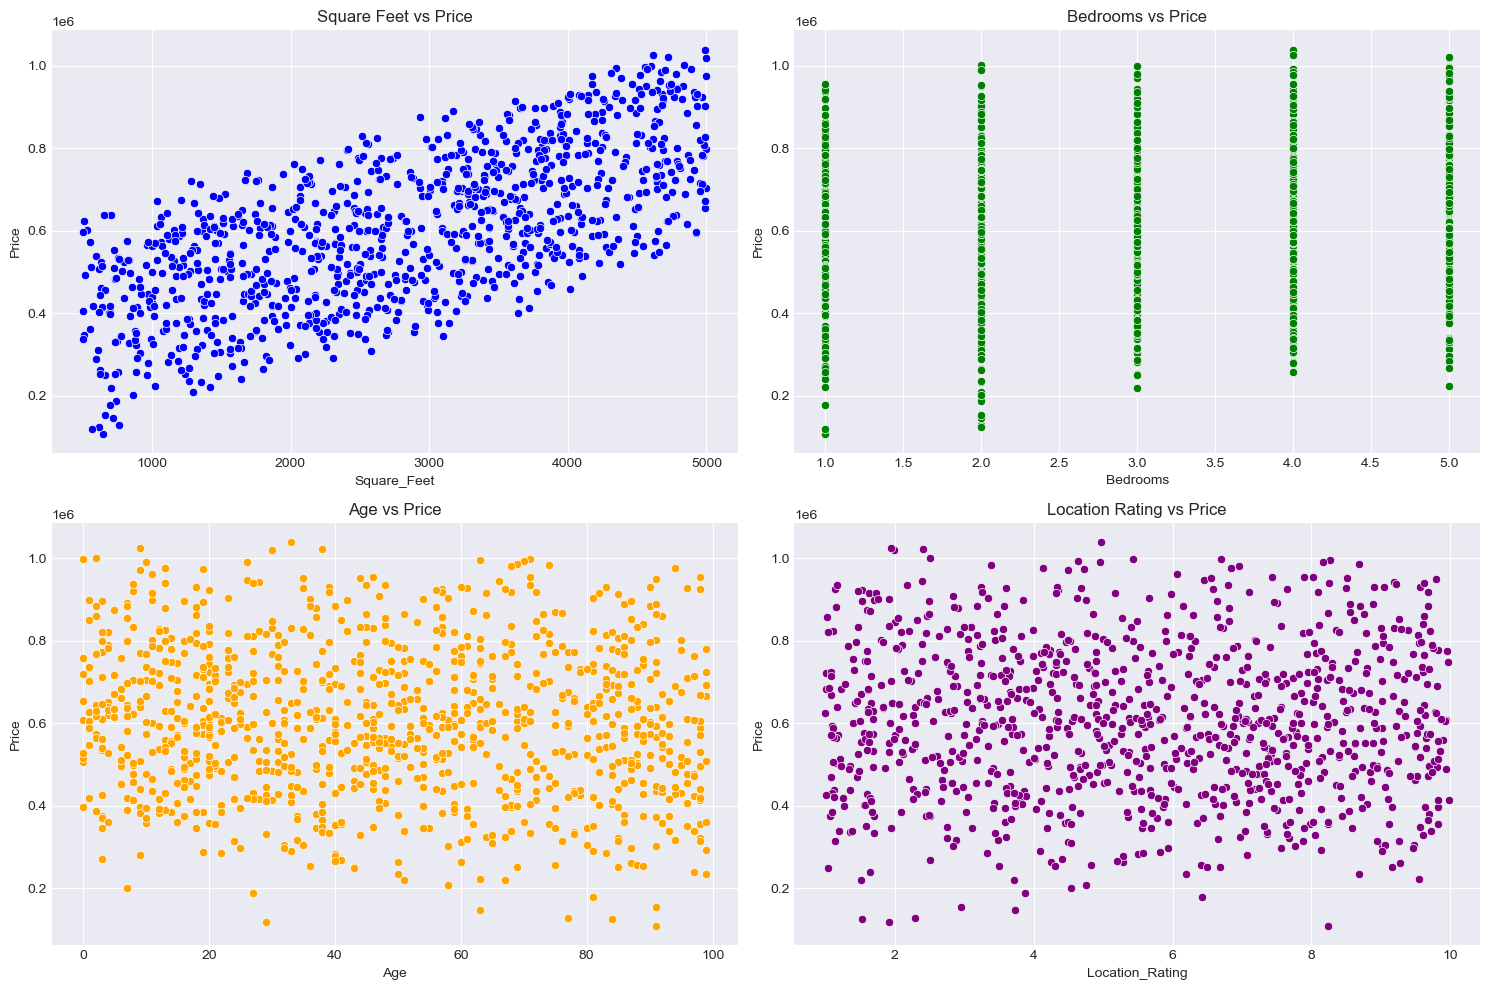

In [10]:
plt.figure(figsize=(15, 10))

# 1. Scatter plot of Square_Feet vs Price
plt.subplot(2, 2, 1)
sns.scatterplot(x='Square_Feet', y='Price', data=housing_data, color='blue')
plt.title('Square Feet vs Price')

# 2. Scatter plot of Bedrooms vs Price
plt.subplot(2, 2, 2)
sns.scatterplot(x='Bedrooms', y='Price', data=housing_data, color='green')
plt.title('Bedrooms vs Price')

# 3. Scatter plot of Age vs Price
plt.subplot(2, 2, 3)
sns.scatterplot(x='Age', y='Price', data=housing_data, color='orange')
plt.title('Age vs Price')

# 4. Scatter plot of Location_Rating vs Price
plt.subplot(2, 2, 4)
sns.scatterplot(x='Location_Rating', y='Price', data=housing_data, color='purple')
plt.title('Location Rating vs Price')

plt.tight_layout()
plt.show()

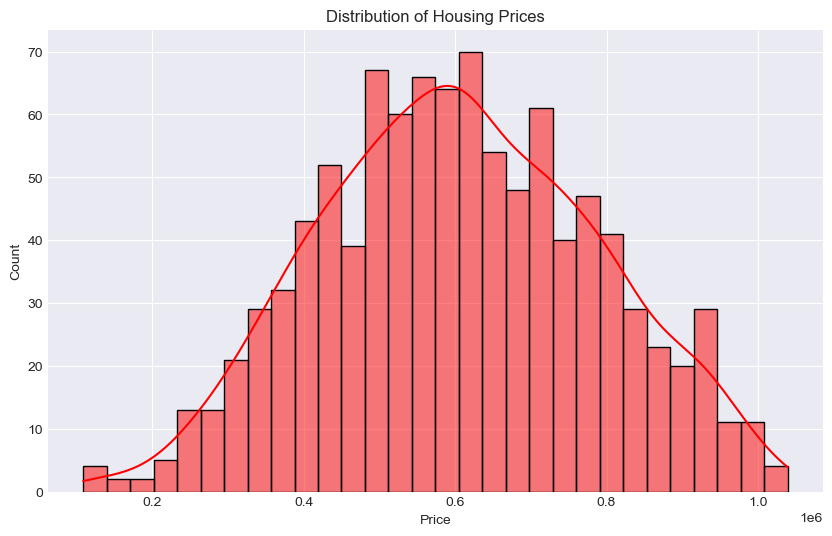

In [11]:
# Distribution of Price
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['Price'], kde=True, color='red', bins=30)
plt.title('Distribution of Housing Prices')
plt.show()

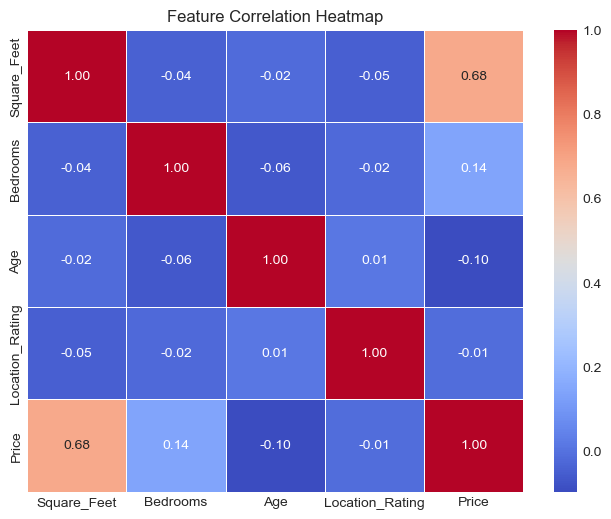

In [12]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(housing_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()
# it visualize relationships between features

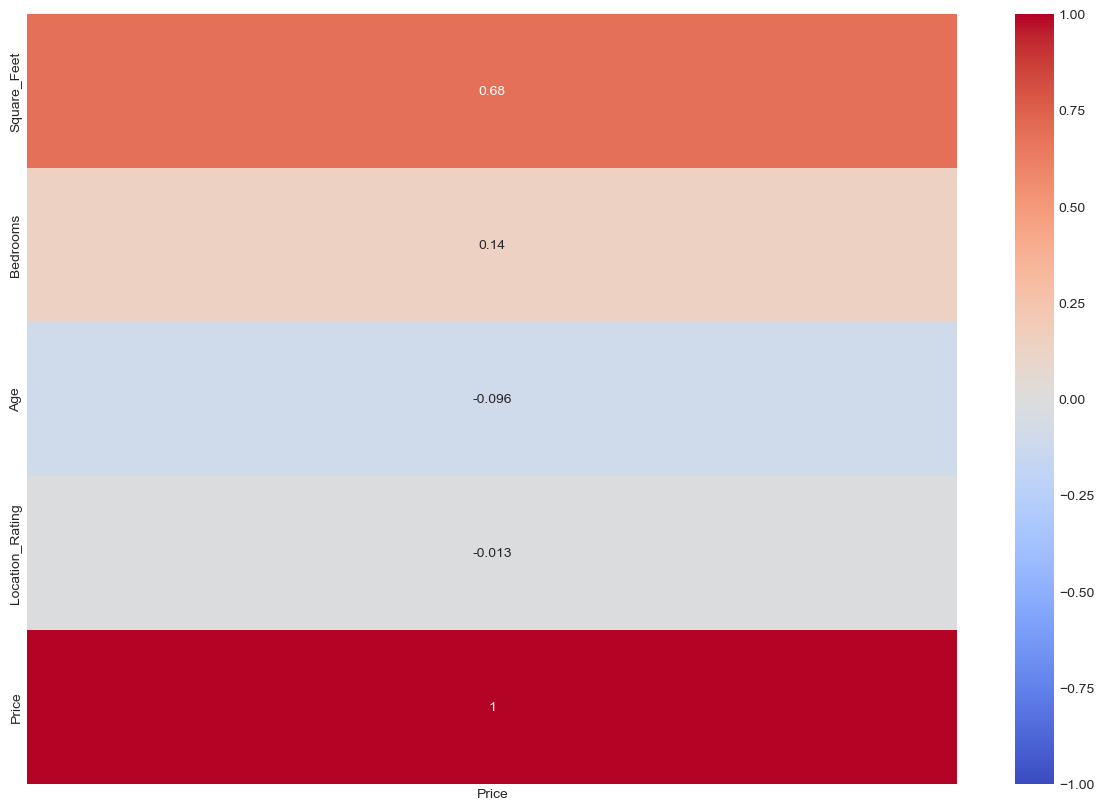

In [13]:
# Calculate and visualize correlation with price
correlation_matrix = housing_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix[['Price']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [14]:
# feature set (X) and target variable (y)
X = housing_data.drop(['Price'], axis=1)
y = housing_data['Price']

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X[0]

array([0.19061388, 0.25      , 0.11111111, 0.6700289 ])

In [16]:
housing_data

,Square_Feet,Bedrooms,Age,Location_Rating,Price
0,1360,2,11,7.017154,600672
1,4272,3,31,7.108030,560878
2,3592,1,95,4.257280,676665
3,966,1,91,6.342947,566043
4,4926,2,12,1.091181,593599
...,...,...,...,...,...
995,3261,4,75,9.002151,531352
996,3179,1,14,6.209261,592094
997,2606,4,40,6.691522,599184
998,4723,5,38,2.408290,1021932


In [17]:
# Split the dataset into 80% training and 20% testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Initialize the regression models
linear_reg = LinearRegression()
knn_regressor = KNeighborsRegressor()
dt_regressor = DecisionTreeRegressor()
xgb_regressor = xgb.XGBRegressor()
rf_regressor = RandomForestRegressor()

# dictionary to hold the models as key and value
regressors = {
    'Random Forest': rf_regressor,
    'Linear Regression': linear_reg,
    'K-Nearest Neighbors': knn_regressor,
    'Decision Tree': dt_regressor,
    'XGBoost': xgb_regressor
}

In [19]:
# Lists to store performance metrics
mse_scores_train = []
mae_scores_train = []
r2_scores_train = []

mse_scores_test = []
mae_scores_test = []
r2_scores_test = []

# Begin training the regression models
## This process involves fitting each model to the training data and evaluating their performance.

### Iterate over each regression model:
#### Train the model on the training data.
#### Store performance metrics (MSE, MAE, R2 score) in their respective lists for both training and testing datasets.
#### Print the performance metrics after evaluating each model.
### Repeat this process for all regression models.



In [20]:
for name, regressor in regressors.items():
    print(f"Training and evaluating {name}...")
    regressor.fit(X_train, y_train)
    
    # Predictions for training data
    y_train_pred = regressor.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Predictions for testing data
    y_test_pred = regressor.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Store the scores
    mse_scores_train.append(train_mse)
    mae_scores_train.append(train_mae)
    r2_scores_train.append(train_r2)

    mse_scores_test.append(test_mse)
    mae_scores_test.append(test_mae)
    r2_scores_test.append(test_r2)
    
    print("\nTraining Scores:")
    print(f"MSE: {train_mse:.4f}")
    print(f"MAE: {train_mae:.4f}")
    print(f"R2 Score: {train_r2:.4f}")

    print("\nTest Scores:")
    print(f"MSE: {test_mse:.4f}")
    print(f"MAE: {test_mae:.4f}")
    print(f"R2 Score: {test_r2:.4f}")

Training and evaluating Random Forest...

Training Scores:
MSE: 2635057704.6860
MAE: 43295.0696
R2 Score: 0.9183

Test Scores:
MSE: 17514190933.1186
MAE: 108313.8286
R2 Score: 0.5051
Training and evaluating Linear Regression...

Training Scores:
MSE: 16381077948.6365
MAE: 110672.4035
R2 Score: 0.4921

Test Scores:
MSE: 16768067723.0172
MAE: 108049.2136
R2 Score: 0.5262
Training and evaluating K-Nearest Neighbors...

Training Scores:
MSE: 13452651910.2421
MAE: 96094.9223
R2 Score: 0.5829

Test Scores:
MSE: 19526581429.5626
MAE: 115268.5550
R2 Score: 0.4482
Training and evaluating Decision Tree...

Training Scores:
MSE: 0.0000
MAE: 0.0000
R2 Score: 1.0000

Test Scores:
MSE: 32517590655.2700
MAE: 145834.0900
R2 Score: 0.0811
Training and evaluating XGBoost...

Training Scores:
MSE: 338840998.8424
MAE: 13302.7457
R2 Score: 0.9895

Test Scores:
MSE: 21443063898.0186
MAE: 119971.7328
R2 Score: 0.3941


<ipython-input-21-14385c68d8b4>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(regressors.keys(), rotation=45, ha='right')
<ipython-input-21-14385c68d8b4>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(regressors.keys(), rotation=45, ha='right')


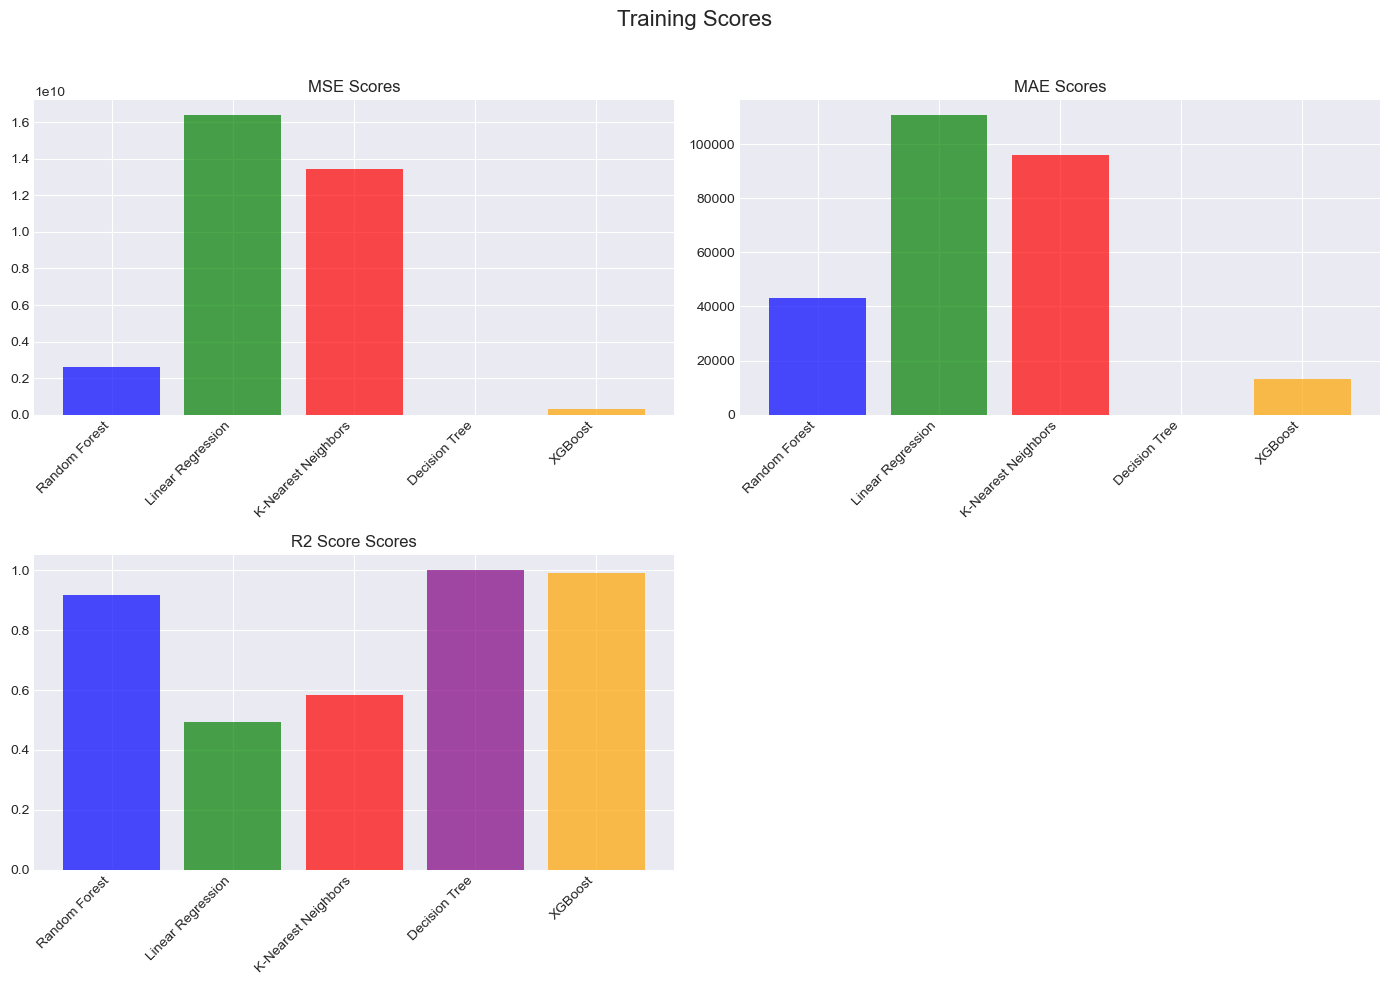

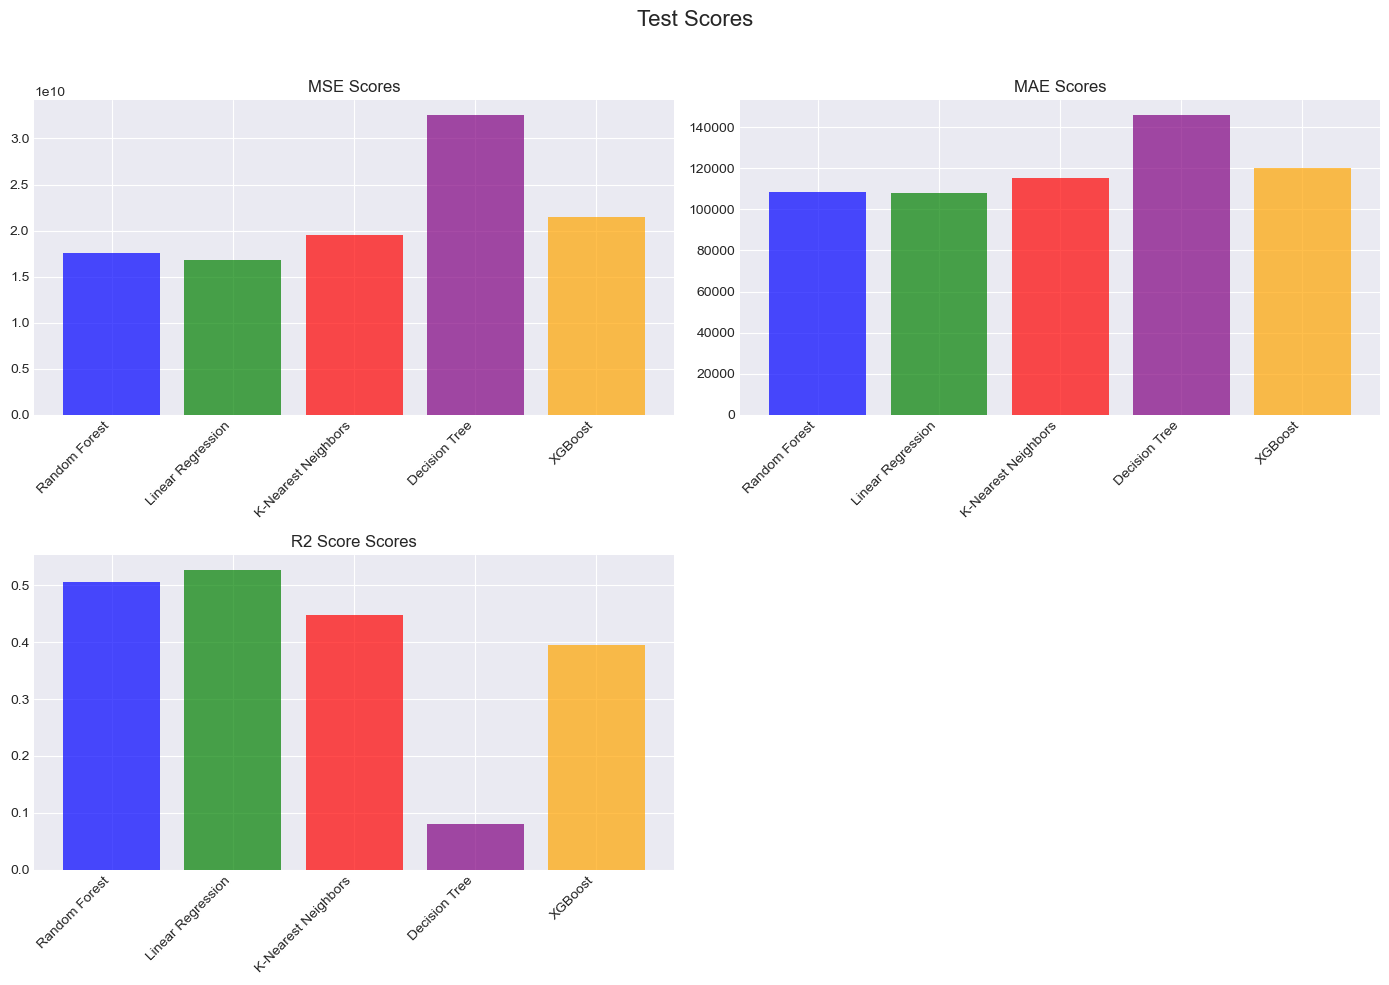

In [21]:
# Define score names and colors for plotting
score_names = ['MSE', 'MAE', 'R2 Score']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan']

# Plot training scores
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Training Scores', fontsize=16)

for i, score_list in enumerate([mse_scores_train, mae_scores_train, r2_scores_train]):
    ax = axes[i // 2, i % 2]
    for j, (reg, score) in enumerate(zip(regressors.keys(), score_list)):
        ax.bar(reg, score, color=colors[j % len(colors)], alpha=0.7, label=f'{reg}')

    ax.set_title(f'{score_names[i]} Scores')
    ax.set_xticklabels(regressors.keys(), rotation=45, ha='right')

# Remove the fourth subplot
fig.delaxes(axes[1, 1])

plt.tight_layout(rect=[0, 0, 1, 0.96])

# Plot test scores
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Test Scores', fontsize=16)

for i, score_list in enumerate([mse_scores_test, mae_scores_test, r2_scores_test]):
    ax = axes[i // 2, i % 2]
    for j, (reg, score) in enumerate(zip(regressors.keys(), score_list)):
        ax.bar(reg, score, color=colors[j % len(colors)], alpha=0.7, label=f'{reg}')

    ax.set_title(f'{score_names[i]} Scores')
    ax.set_xticklabels(regressors.keys(), rotation=45, ha='right')

# Remove the fourth subplot
fig.delaxes(axes[1, 1])

plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()


# Feature Engineering
## The initial results from the original dataset indicate suboptimal test scores.
## To improve model performance, we will perform feature engineering, which includes:
### Adding new features to the dataset or increasing the dataset size.
### Removing outliers.
### Introducing additional columns, such as:
#### House age in years

In [22]:
# Calculate house age in years (20**) or (19**)
current_year = 2024 
housing_data['House_Age'] = current_year - housing_data['Age']

In [23]:
housing_data

,Square_Feet,Bedrooms,Age,Location_Rating,Price,House_Age
0,1360,2,11,7.017154,600672,2013
1,4272,3,31,7.108030,560878,1993
2,3592,1,95,4.257280,676665,1929
3,966,1,91,6.342947,566043,1933
4,4926,2,12,1.091181,593599,2012
...,...,...,...,...,...,...
995,3261,4,75,9.002151,531352,1949
996,3179,1,14,6.209261,592094,2010
997,2606,4,40,6.691522,599184,1984
998,4723,5,38,2.408290,1021932,1986


Price              1.000000
Square_Feet        0.681525
Bedrooms           0.140972
House_Age          0.096490
Location_Rating   -0.013185
Age               -0.096490
Name: Price, dtype: float64


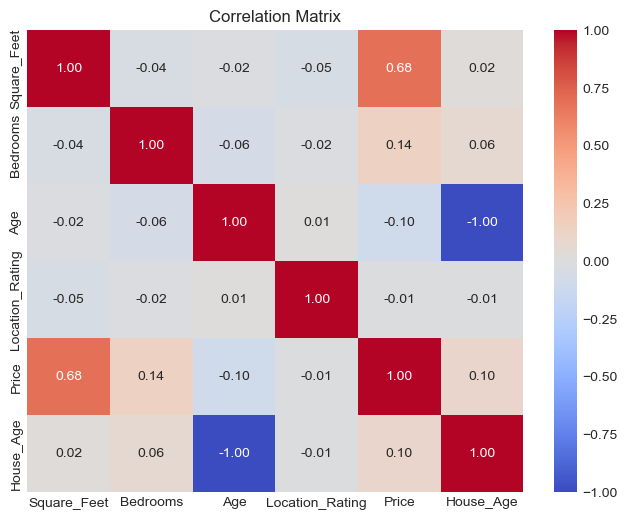

In [24]:
correlation_matrix = housing_data.corr()

# Print the correlation with the target variable 'Price'
print(correlation_matrix['Price'].sort_values(ascending=False))

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


<ipython-input-25-3717f6c52baf>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


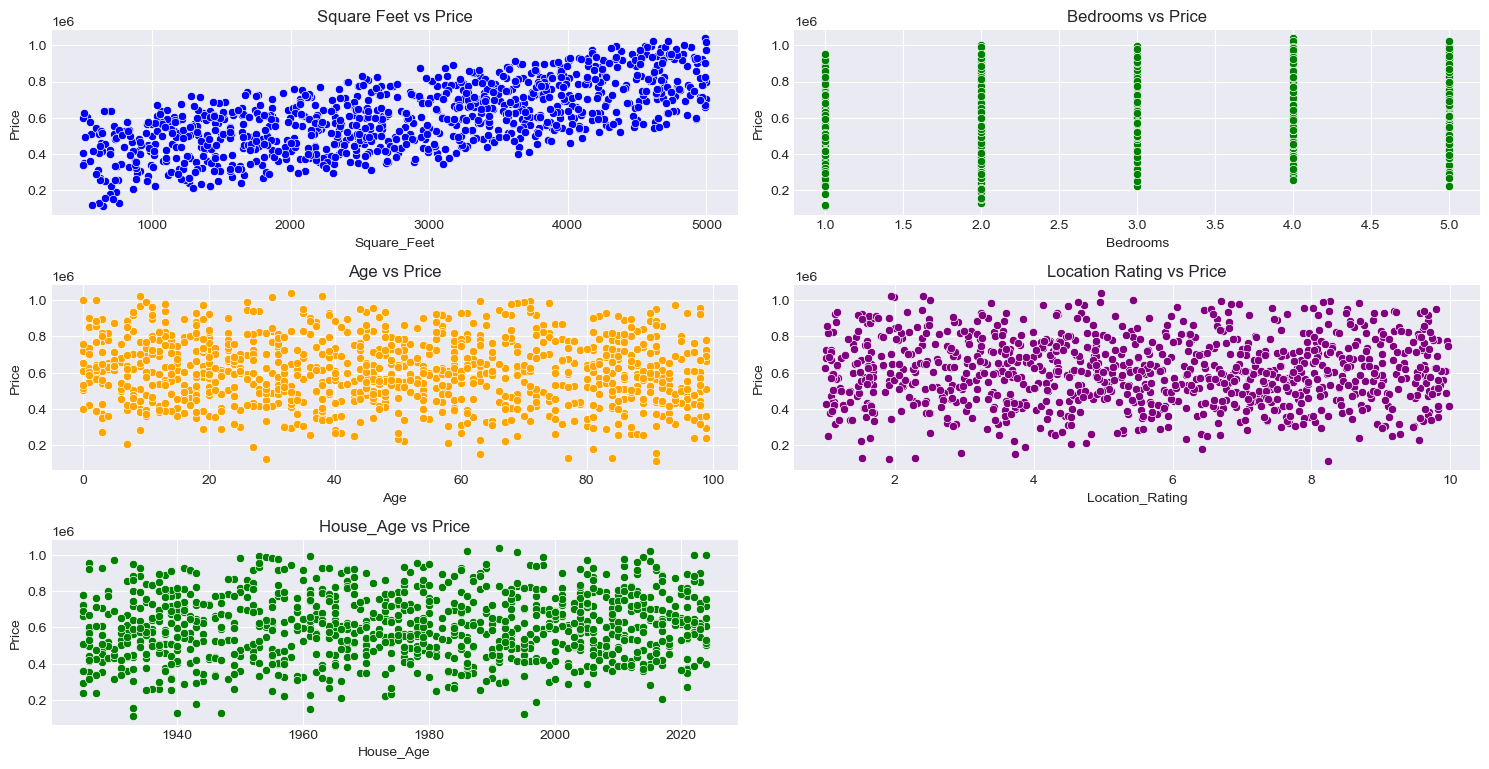

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting environment
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(15, 10))

# 1. Scatter plot of Square_Feet vs Price
plt.subplot(4, 2, 1)
sns.scatterplot(x='Square_Feet', y='Price', data=housing_data, color='blue')
plt.title('Square Feet vs Price')

# 2. Scatter plot of Bedrooms vs Price
plt.subplot(4, 2, 2)
sns.scatterplot(x='Bedrooms', y='Price', data=housing_data, color='green')
plt.title('Bedrooms vs Price')

# 3. Scatter plot of Age vs Price
plt.subplot(4, 2, 3)
sns.scatterplot(x='Age', y='Price', data=housing_data, color='orange')
plt.title('Age vs Price')

# 4. Scatter plot of Location_Rating vs Price
plt.subplot(4, 2, 4)
sns.scatterplot(x='Location_Rating', y='Price', data=housing_data, color='purple')
plt.title('Location Rating vs Price')

# 5. Scatter plot of Bedrooms vs Price
plt.subplot(4, 2, 5)
sns.scatterplot(x='House_Age', y='Price', data=housing_data, color='green')
plt.title('House_Age vs Price')

plt.tight_layout()
plt.show()


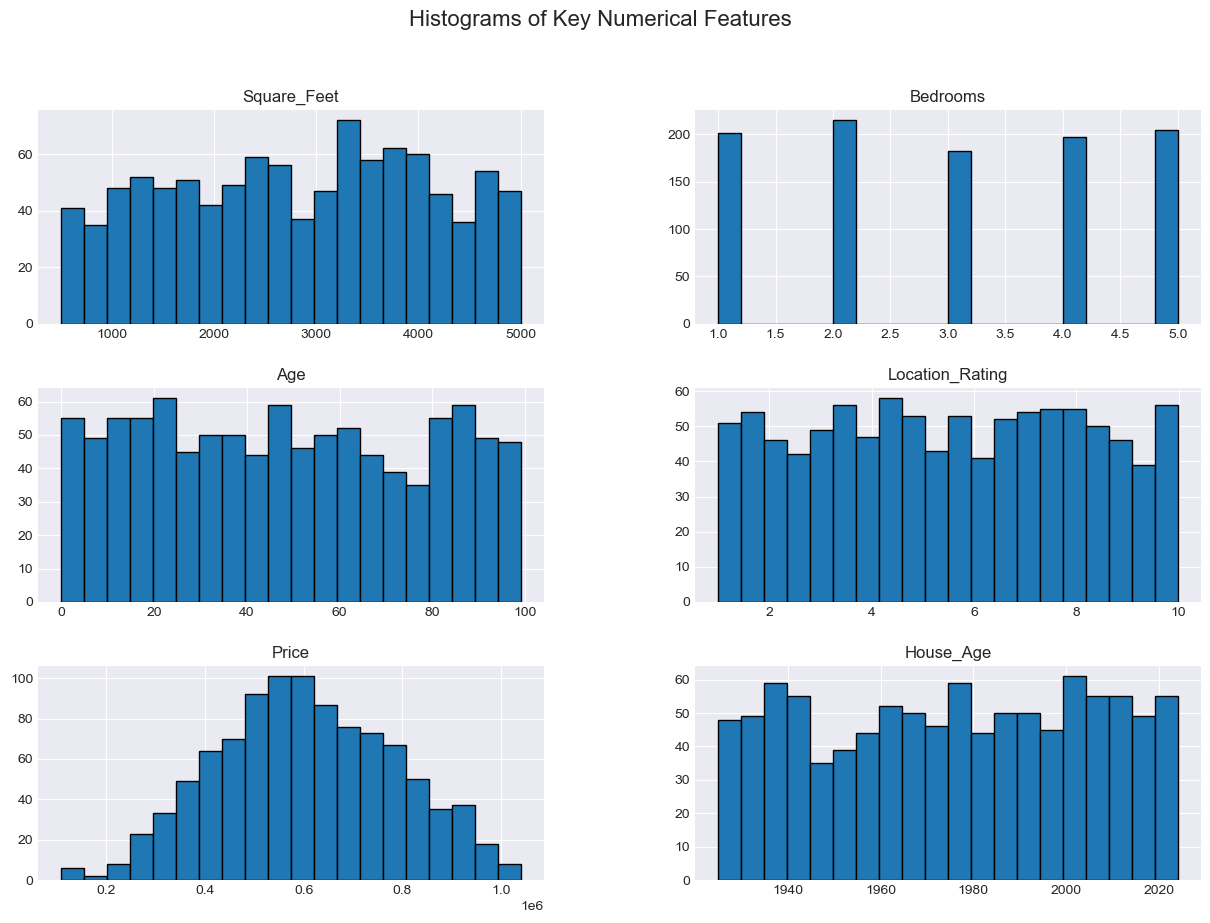

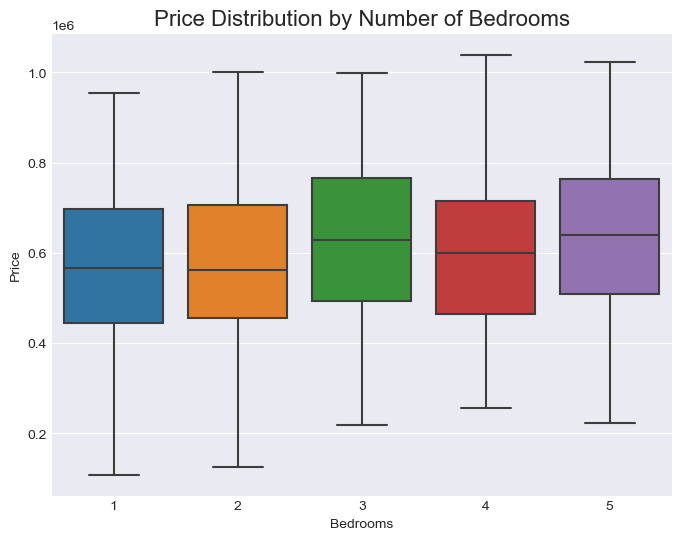

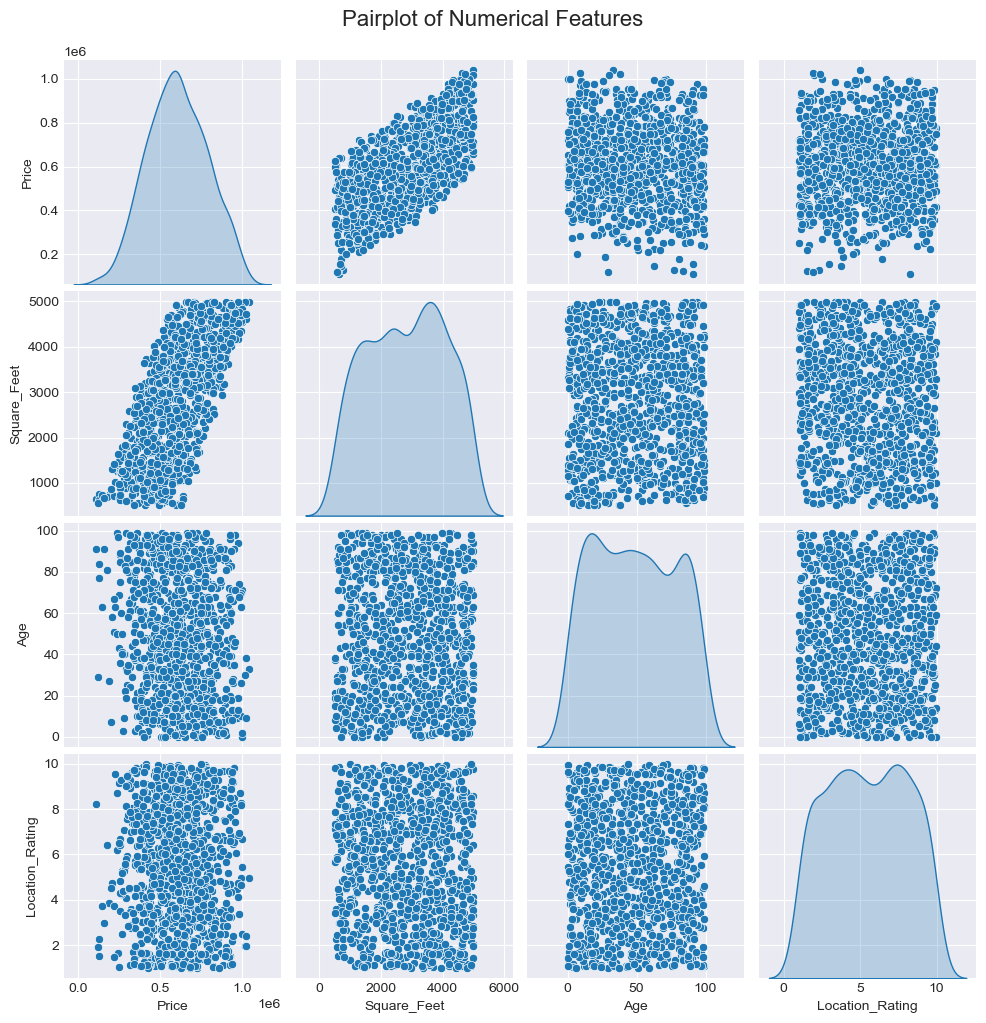

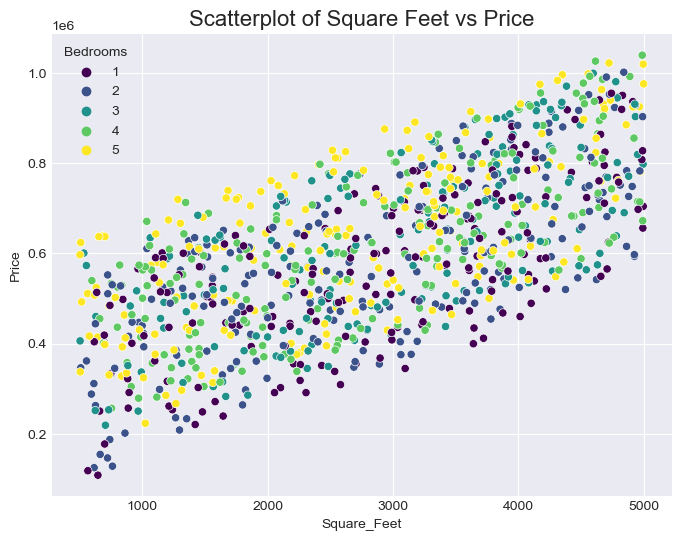

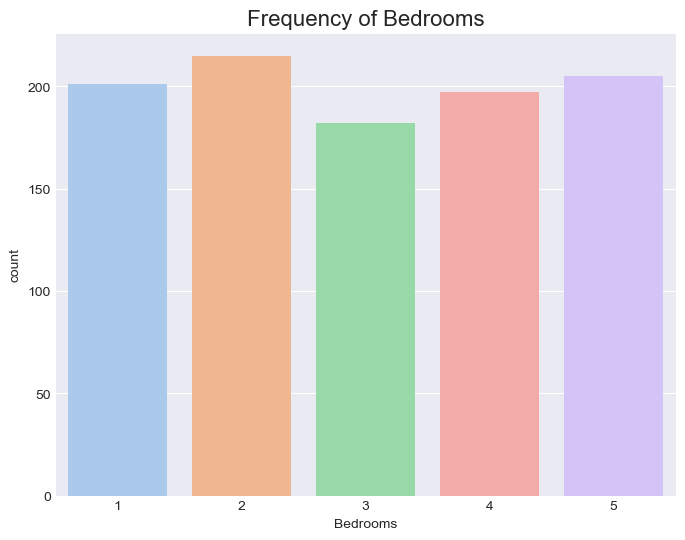

In [26]:


# 1. Histograms: Distribution of key numerical features
def plot_histograms(data):
    data.hist(bins=20, figsize=(15, 10), edgecolor='black')
    plt.suptitle('Histograms of Key Numerical Features', fontsize=16)
    plt.show()

# 2. Boxplot: Price distribution across different bedroom counts
def plot_boxplot(data):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Bedrooms', y='Price', data=data)
    plt.title('Price Distribution by Number of Bedrooms', fontsize=16)
    plt.show()

# 3. Pairplot: Relationship between numerical features
def plot_pairplot(data):
    sns.pairplot(data[['Price', 'Square_Feet', 'Age', 'Location_Rating']], diag_kind='kde')
    plt.suptitle('Pairplot of Numerical Features', fontsize=16, y=1.02)
    plt.show()

# 5. Scatterplot: Relationship between Square_Feet and Price
def plot_scatter(data):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Square_Feet', y='Price', hue='Bedrooms', palette='viridis', data=data)
    plt.title('Scatterplot of Square Feet vs Price', fontsize=16)
    plt.show()

# 6. Bar Plot: Frequency of Bedrooms
def plot_bar(data):
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Bedrooms', data=data, palette='pastel')
    plt.title('Frequency of Bedrooms', fontsize=16)
    plt.show()

# Generate all plots
plot_histograms(housing_data)
plot_boxplot(housing_data)
plot_pairplot(housing_data)
plot_scatter(housing_data)
plot_bar(housing_data)


In [27]:
# feature set (X) and target variable (y)
X = housing_data.drop(['Price', 'Age', 'Location_Rating'], axis=1)
y = housing_data['Price']

In [28]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X[0]

array([0.19061388, 0.25      , 0.88888889])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
# Define XGBoost Regressor with regularization parameters
xgb_regressor = xgb.XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    alpha=0.5,  
    reg_lambda=1.0, 
    min_child_weight=20,  
    random_state=42
)

# Train the model with early stopping on a validation set
xgb_regressor.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=10,  # Stop if no improvement in 10 rounds
    verbose=False
)

# Predictions
y_pred_train = xgb_regressor.predict(X_train)
y_pred_test = xgb_regressor.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the results
print("\nAdvanced Regularization XGBoost Performance:")
print(f"Training MSE: {mse_train:.2f}, Training R²: {r2_train:.2f}")
print(f"Test MSE: {mse_test:.2f}, Test R²: {r2_test:.2f}")



Advanced Regularization XGBoost Performance:
Training MSE: 13797866838.98, Training R²: 0.57
Test MSE: 17481057508.73, Test R²: 0.51


/home/mostafatarek/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [61]:
# # Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize XGBoost regressor
# xgb_regressor = xgb.XGBRegressor()

# # Hyperparameter tuning using Grid Search
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.5, 0.75, 1.0],
#     'alpha': [0.5, 1.0],
#     'reg_lambda': [0.5, 1.0],
#     'min_child_weight': [5, 10, 20, 30, 40, 50],
# }

# # Perform Grid Search with 5-fold cross-validation
# grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# # Get the best model
# best_xgb = grid_search.best_estimator_



# # Evaluate the model
# y_pred_xgb_train = best_xgb.predict(X_train)
# y_pred_xgb_test = best_xgb.predict(X_test)

# mse_xgb_train = mean_squared_error(y_train, y_pred_xgb_train)
# r2_xgb_train = r2_score(y_train, y_pred_xgb_train)

# mse_xgb_test = mean_squared_error(y_test, y_pred_xgb_test)
# r2_xgb_test = r2_score(y_test, y_pred_xgb_test)

# print("\nXGBoost Performance:")
# print(f"Best Parameters: {grid_search.best_params_}")
# print(f"Training MSE: {mse_xgb_train:.2f}, Training R²: {r2_xgb_train:.2f}")
# print(f"Test MSE: {mse_xgb_test:.2f}, Test R²: {r2_xgb_test:.2f}")

In [34]:
# Save the model to a file
joblib.dump(xgb_regressor, 'best_xgb_model_house_price.pkl')
print("Model saved as 'best_xgb_model_house_price.pkl'.")

Model saved as 'best_xgb_model_house_price.pkl'.


In [35]:
# load the model and use it later
def load_model_and_predict(X_new):
    loaded_model = joblib.load('best_xgb_model.pkl')
    predictions = loaded_model.predict(X_new)
    return predictions

In [42]:
housing_data

,Square_Feet,Bedrooms,Age,Location_Rating,Price,House_Age
0,1360,2,11,7.017154,600672,2013
1,4272,3,31,7.108030,560878,1993
2,3592,1,95,4.257280,676665,1929
3,966,1,91,6.342947,566043,1933
4,4926,2,12,1.091181,593599,2012
...,...,...,...,...,...,...
995,3261,4,75,9.002151,531352,1949
996,3179,1,14,6.209261,592094,2010
997,2606,4,40,6.691522,599184,1984
998,4723,5,38,2.408290,1021932,1986


In [55]:
X_test[0]

array([0.40191281, 0.5       , 0.53535354])

In [58]:
y_test

521    727404
737    456419
740    565598
660    927751
411    434800
        ...  
408    769635
332    125335
208    812865
613    478056
78     782819
Name: Price, Length: 200, dtype: int64

In [59]:
def load_model_and_predict(X_new):
    X_new = np.array(X_new).reshape(1, -1)
    loaded_model = joblib.load('best_xgb_model_house_price.pkl')
    predictions = loaded_model.predict(X_new)
    return predictions

In [60]:
load_model_and_predict(X_test[0])

array([705605.2], dtype=float32)